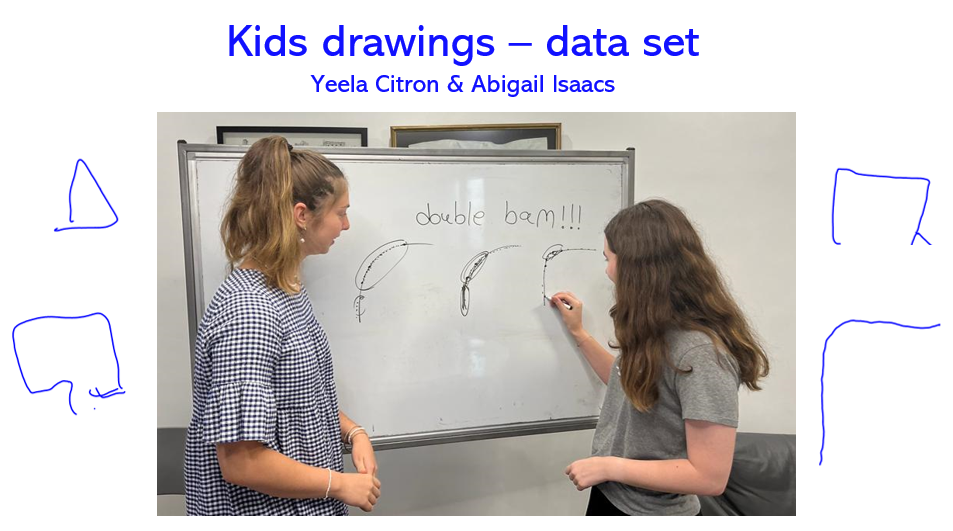

### In this project we received kids drawings and for each drawing we need to build an algorithem to figure out the following information:
- The number of times the child raised his hand from the drawing
- The number of lines in the drawing
- The length of each line and the average pressure the child apply on the page for each line
- Is the drawing is a close shape?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

#  <font color='blue'> Number of lifts </font>

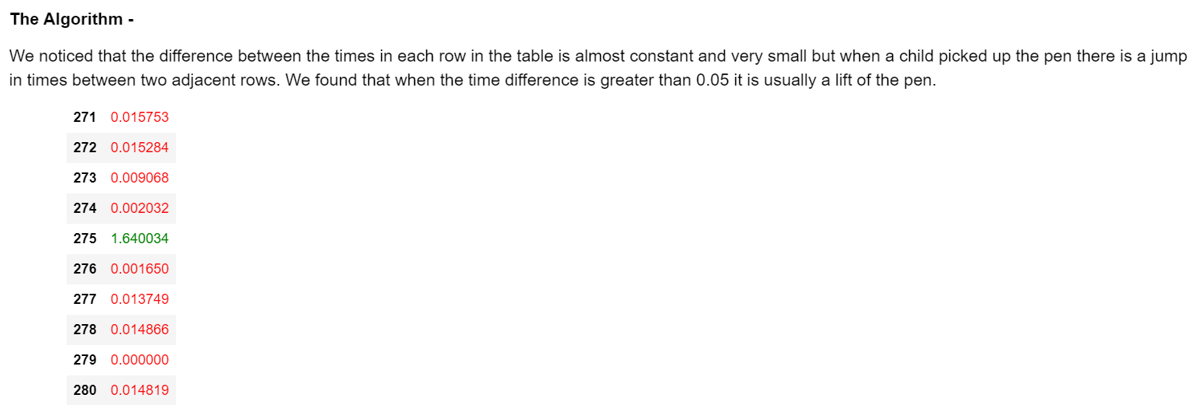

In [36]:
def numLift (pic):
    diffrence = makeDiff(pic)
    count = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            count = count+1
     
    return (count)

#  <font color='blue'> Number of lines - first try </font>

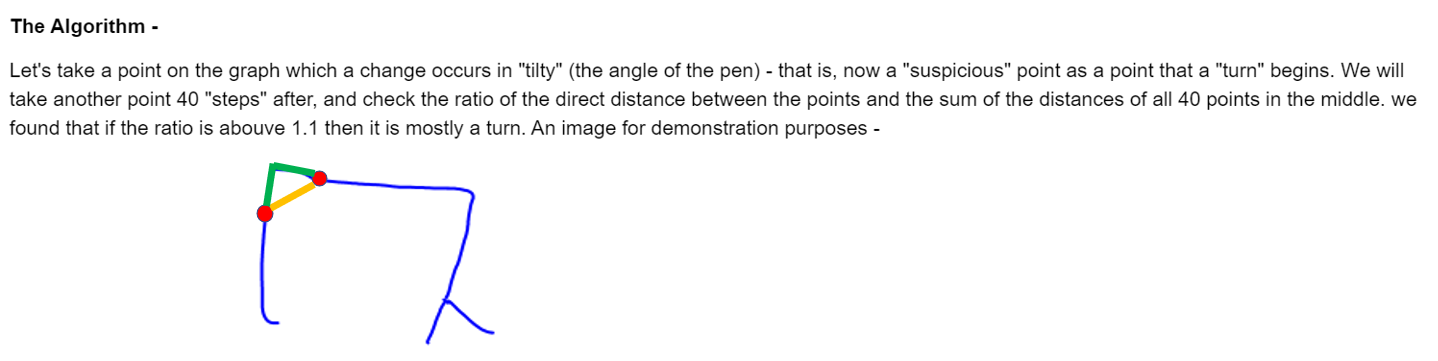

In [5]:
def numLiftToLine (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines2(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)    

In [99]:
def countlines2 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=0
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
       
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]
            if ((sumdis/d )>1.1): 
                counter = counter +1
                plt.scatter(pic['X'][math.ceil((i+end)/2)],-pic[' Y'][math.ceil((end+i)/2)], s=15)
                i = i+39
        
        i = i+1 
            
         
    return (counter)

# <font color='blue'> Number of lines - second try </font>

We saw that there is not always a change in "tilty" ("tilty" and "tiltx" have a similar behavior) even though the child made a sharp turn, so we tried a different algorithm -

We will take a point on the drawing and take two another points -  30 "steps" before and 30 "steps" after the point.
We calculate the direct distance between the points and the sum of the distances between all the points between them and we calculate the ratio.
If the ratio is abouve 1.25 we will mark this as a new line.

In [7]:
def numLiftToLine2 (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines22(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)  

In [100]:
def countlines22 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=30
    sumdis = 0
    
    while (i<pic.shape[0]-30):
        sumdis = 0
        d = 0
        x1 = pic['X'][i-30]
        y1 =pic[' Y'][i-30]
        x2 = pic['X'][i+30]
        y2 =pic[' Y'][i+30]
     
        p = [x1,y1]
        q = [x2,y2]
        d = math.dist(p, q)
        for j in range(i-30,i+30):
            sumdis = sumdis+ diffrence['distance'][j]
       
        if ((sumdis/d )>1.25): 
            counter = counter +1
            plt.scatter(pic['X'][i],-pic[' Y'][i], s=15)
            i = i+59
        
        i = i+1 
            
         
    return (counter)

#  <font color='blue'> Number of lines - combining the two algorithems from first and second trys </font> 

The idea -
If there is a change in "tilty" then do algorithm 1 and if not then do algorithm 2

In [9]:
def numLiftToLine3 (pic):
    diffrence = makeDiff(pic)
    t =[0]
    counter = 0
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
    fig, ax = plt.subplots()
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        drow(pict)
        add = countlines3(pict)
        counter = counter + add
    print ("number of lines - ") 
    print (counter)

In [106]:
def countlines3 (pic):
    diffrence = makeDiff(pic)
    counter= 1
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                counter = counter +1
                plt.scatter(pic['X'][math.ceil((i+end)/2)],-pic[' Y'][math.ceil((end+i)/2)], s=15)
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    counter = counter +1
                    plt.scatter(pic['X'][i],-pic[' Y'][i], s=15)
                    i = i+59

        
        i = i+1         
         
    return (counter)

# <font color='blue'> Length and pressure of the lines  </font>

In [11]:
def LenLine (pic):
    diffrence = makeDiff(pic)
    t =[0]
    dis = []
    counter = 0
    presher = []
    for i in range(0,diffrence.shape[0]):
        if (diffrence['time'][i]> 0.05):
            t.append(i+1)
            
    t.append(pic.shape[0])  
   
    for i in range(1,len(t)):
        pict = pic[ t[i-1] : t[i]]
        pict = pict.reset_index()
        
        dis =dis+ countlines2LenLine(pict)
        presher = presher+ liftPresher(pict)
    
    print ("distances -")
    print (dis)  
    print ("pressures -")
    print (presher) 

In [12]:
def liftPresher (pic):
    iii = [0]
    presher = []
    diffrence = makeDiff(pic)
   
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                
                iii.append(math.ceil((i+end)/2))
                
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    iii.append(i)
                   
                    i = i+59

        
        i = i+1         
            
    iii.append(pic.shape[0]-1) 
    for m in range(0,len(iii)-1):
        sumpresh=0
        counter =0
        for n in range(iii[m],iii[m+1]):
            sumpresh = sumpresh + pic[' Pressure'][n]
            counter = counter+1
        presher.append(sumpresh/counter)
    return (presher)

In [13]:
def countlines2LenLine (pic):
    
    iii = [0]
    line = []
    diffrence = makeDiff(pic)
   
    i=30
    sumdis = 0
   
    while (i<diffrence.shape[0]-40):
        sumdis = 0
        d = 0
        if ((diffrence['tilty'][i]) > 0):
           
            x = pic['X'][i]
            y =pic[' Y'][i]
            
            end = diffrence.shape[0]
            if (i<= diffrence.shape[0]-40):
                end = i+40
            x2 = pic['X'][end]
            y2 =pic[' Y'][end]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
          
            for j in range(i,end):
                sumdis = sumdis+ diffrence['distance'][j]         
                
            if ((sumdis/d )>1.1): 
                
                iii.append(math.ceil((i+end)/2))
                
                i = i+59
        else:
                sumdis = 0
                d = 0

                x1 = pic['X'][i-30]
                y1 =pic[' Y'][i-30]
                x2 = pic['X'][i+30]
                y2 =pic[' Y'][i+30]
     
                p = [x1,y1]
                q = [x2,y2]
                d = math.dist(p, q)
                for j in range(i-30,i+30):
                    sumdis = sumdis+ diffrence['distance'][j]
       
                if ((sumdis/d )>1.25): 
                    iii.append(i)
                   
                    i = i+59

        
        i = i+1         
            
    iii.append(pic.shape[0]-1) 
    for m in range(0,len(iii)-1):
        x3 = pic['X'][iii[m]]
        y3 = pic[' Y'][iii[m]]
        
        x4 = pic['X'][iii[m+1]]
        y4 = pic[' Y'][iii[m+1]]
        p = [x3,y3]
        q = [x4,y4]
        d = math.dist(p, q)
        line.append(d)
    return (line)

#  <font color='blue'> Checking if the drawing is a closed shape </font>

The Algorithm -
For each point in the graph we will check all the points that apear after in the graph and check for the folowing:
- 1) The distance between the two points is less than 10.
- 2) The time difference between the two points is relatively large -
 if a child draws the whole drawing fast (less than 5 seconds) then the time difference we will examine can be no more than 1 second.
 And if the child draws slowly (more than 5 seconds) - then the time difference should be over 3 seconds.

If this happens then it is a sign that there is a overlap between two lines.

In addition, we found that if the number of lifts in the child's drawing plus one is smaller or equals to the number of overlaps that means there is a closed shape.

In [44]:
def isClosed (pic):
    if ((numLift(pic) +1) <= numOfCut(pic)):
        return True
    else:
        return False

In [102]:
def numOfCut (pic):
    
    if ((pic[' Time'][pic.shape[0]-1] - pic[' Time'][0])<5):
        sec = 1
    else:
        sec = 3
       
    counter = 0
    i=0
    while ( i < pic.shape[0]):
    
        x = pic['X'][i]
        y =pic[' Y'][i]
        
        for j in range(i+1,pic.shape[0]):
            x2 = pic['X'][j]
            y2 =pic[' Y'][j]
            p = [x,y]
            q = [x2,y2]
            d = math.dist(p, q)
            t1 = pic[' Time'][i]
            t2 = pic[' Time'][j]
            t = abs(t1-t2)
            t = float (t)
             
            if ((d<10) & (t>sec)):
                counter = counter + 1
                plt.scatter(pic['X'][i],-pic[' Y'][i], s=30, color = 'black')
                i = i+29
                break
        i = i+1
    
    return (counter)

#  <font color='blue'> Cleaning the data </font>

In [28]:
def clean (pic):
    pic = pic.drop(pic.shape[0]-1)
    pic = pic.drop(pic.shape[0]-1)
    pic[' Time'] = pic[' Time'].replace(regex=[':'], value='')
    for i in range(0,pic.shape[0]):
        pic['X'][i] = float(pic['X'][i])
        pic[' Time'][i] = float(pic[' Time'][i])

    return pic

#  <font color='blue'> Creating a table with the differences between the rows </font>

In [17]:
def makeDiff(pic):
    times = []
    dis = []
    tiltx = []
    tilty = []
    Pressure = []
    for i in range(1,pic.shape[0]):
        time = pic[' Time'][i] - pic[' Time'][i-1]
        times.append(time)
        p = [pic['X'][i-1],pic[' Y'][i-1]]
        q = [pic['X'][i],pic[' Y'][i]]
        distance = math.dist(p, q)
        dis.append(distance)
        tx = abs(pic[' TiltX'][i] - pic[' TiltX'][i-1])
        ty = abs(pic[' TiltY'][i] - pic[' TiltY'][i-1])
        tiltx.append(tx)
        tilty.append(ty)
        pr = abs(pic[' Pressure'][i] - pic[' Pressure'][i-1])
        Pressure.append(pr)
    diffrence = pd.DataFrame({'time':times, 'distance':dis , 'tiltx':tiltx,'tilty':tilty, 'Pressure':Pressure })   
    return (diffrence)


In [18]:
def _color_red_or_green(val):
    color = 'red' if val < 0.05 else 'green'
    return 'color: %s' % color

#  <font color='blue'> Ploting the image </font>

In [218]:
def drow (pic4):

    plt.xlim([min(pic4['X'])-200,max(pic4['X'])+200])
    plt.ylim([min(-pic4[' Y'])-200,max(-pic4[' Y'])+200])

    plt.scatter(pic4['X'],-pic4[' Y'], s=0.1)

    plt.show()

### We took the difference table and with the help of coloring the values according to different thresholds we could more easily understand the data and find changes that indicate on different things.
### For example:

In [95]:
makeDiff(pic4).style.applymap(_color_red_or_green)

,time,distance,tiltx,tilty,Pressure
0,0.005037,2.631622,0.000000,0.000000,0.014648
1,0.019573,6.893230,52.000000,38.000000,0.136963
2,0.000000,10.169340,0.000000,0.000000,0.029541
3,0.015188,6.499174,33.000000,55.000000,0.026611
4,0.010512,2.423483,0.000000,0.000000,0.010498
5,0.015625,4.948214,0.000000,0.000000,0.020996
6,0.015621,14.569454,51.000000,78.000000,0.039551
7,0.000000,14.474412,32.000000,45.000000,0.030762
8,0.015622,4.093215,17.000000,25.000000,0.008301
9,0.015625,17.535679,55.000000,71.000000,0.031006


#  <font color='blue'> Let's check if our algorithems works: </font>

### <font color='blue'> pic1-  </font>

In [25]:
pic1 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7569\SimpleTest\4.csv")

In [31]:
pic1 = clean(pic1)

In [37]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic1)))

The number of times the child raised his hand from the drawing: 1


<IPython.core.display.Javascript object>


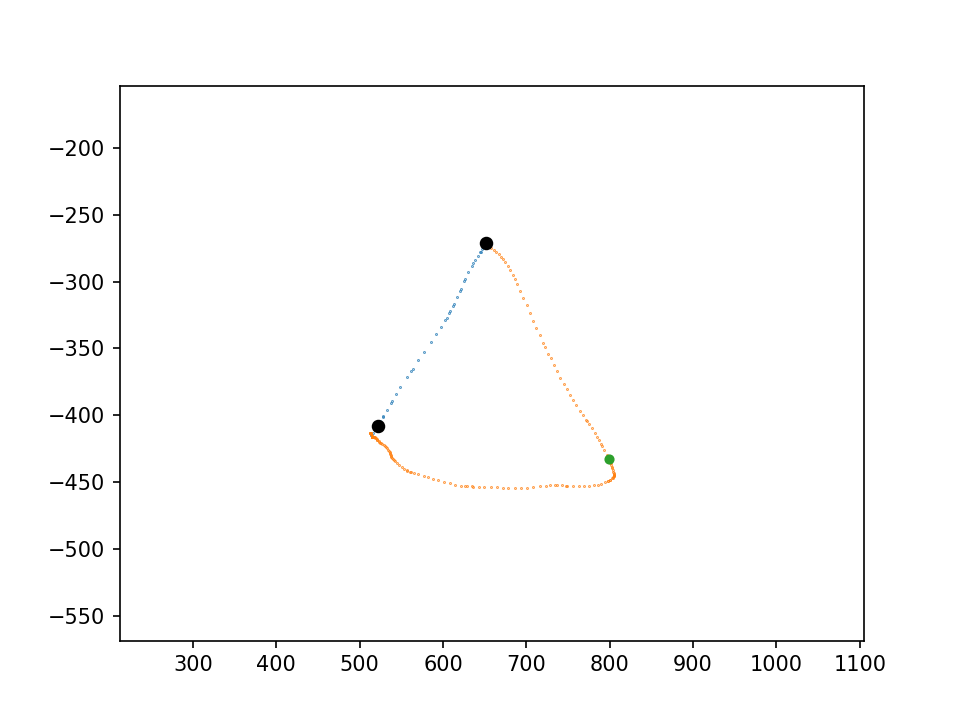

number of lines - 
3


In [103]:
numLiftToLine3(pic1) 

In [41]:
LenLine(pic1)

distances -
[199.0796729135374, 220.50075579518995, 287.3988580546401]
pressures -
[0.48793168501420453, 0.5942925347222222, 0.7791031125992064]


In [104]:
isClosed(pic1)

True

### <font color='blue'> pic2-  </font>

In [62]:
pic2 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7569\SimpleTest\6.csv")

In [63]:
pic2 = clean(pic2)

In [52]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic2)))

The number of times the child raised his hand from the drawing: 0


<IPython.core.display.Javascript object>


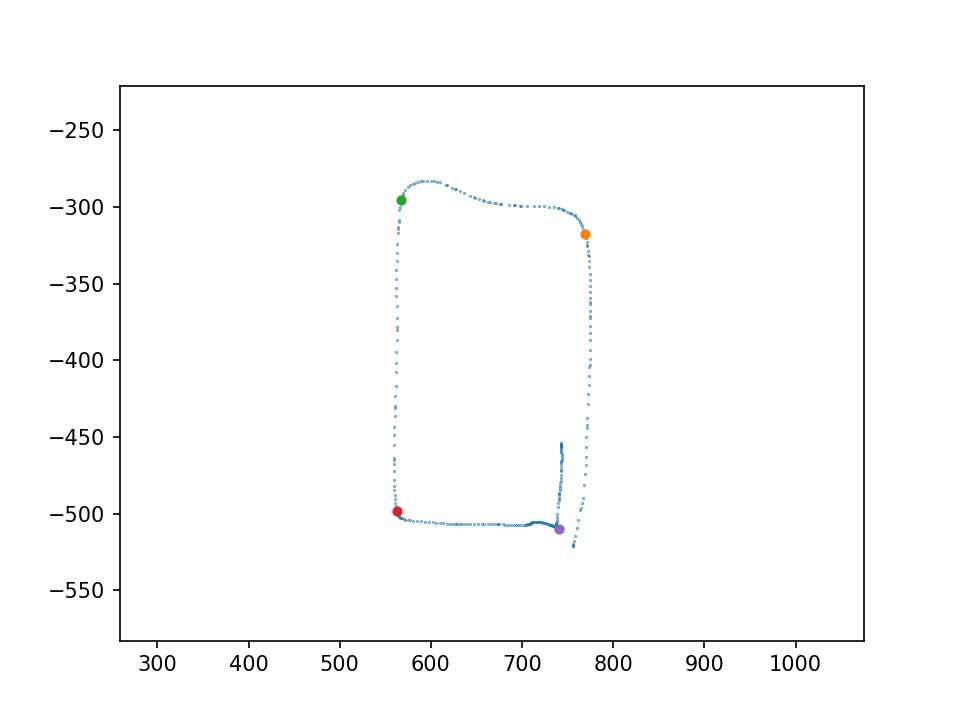

number of lines - 
5


In [107]:
numLiftToLine3(pic2) 

In [55]:
LenLine(pic2)

distances -
[204.11068359164835, 203.02173479704086, 203.09166518950153, 178.50578646861217, 56.02219979119418]
pressures -
[0.7054275811887255, 0.8138131806344697, 0.783203125, 0.7700828269675926, 0.7995231784119898]


In [108]:
isClosed(pic2)

False

### <font color='blue'> pic3-  </font>

In [66]:
pic3 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7573\SimpleTest\8.csv")

In [67]:
pic3 = clean(pic3)

In [68]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic3)))

The number of times the child raised his hand from the drawing: 1


### First try

<IPython.core.display.Javascript object>


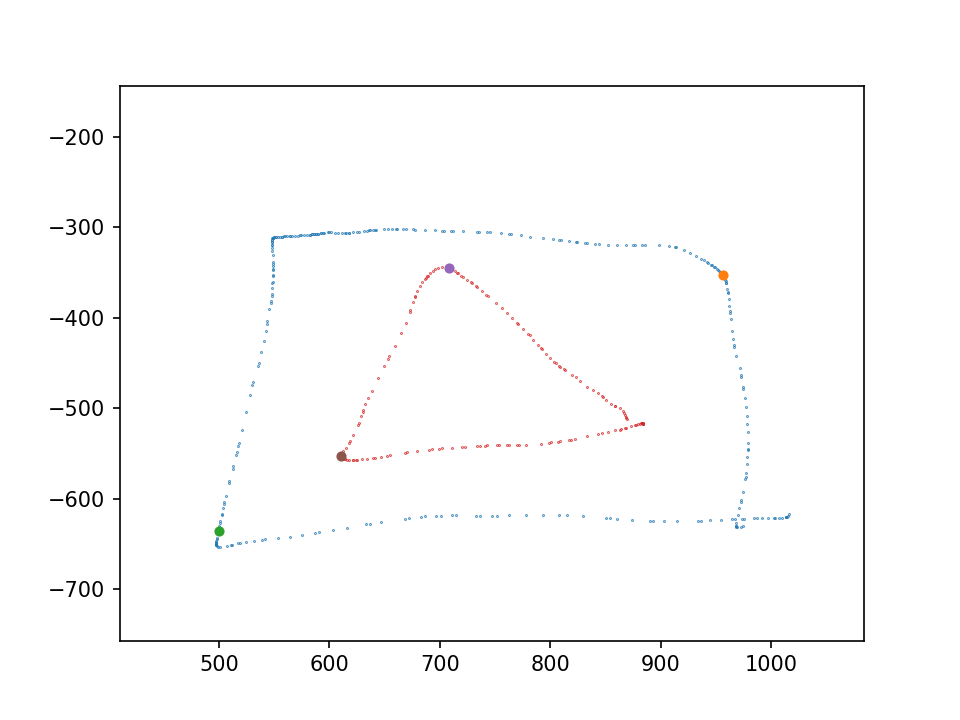

number of lines - 
6


In [171]:
numLiftToLine(pic3)

### Second try

<IPython.core.display.Javascript object>


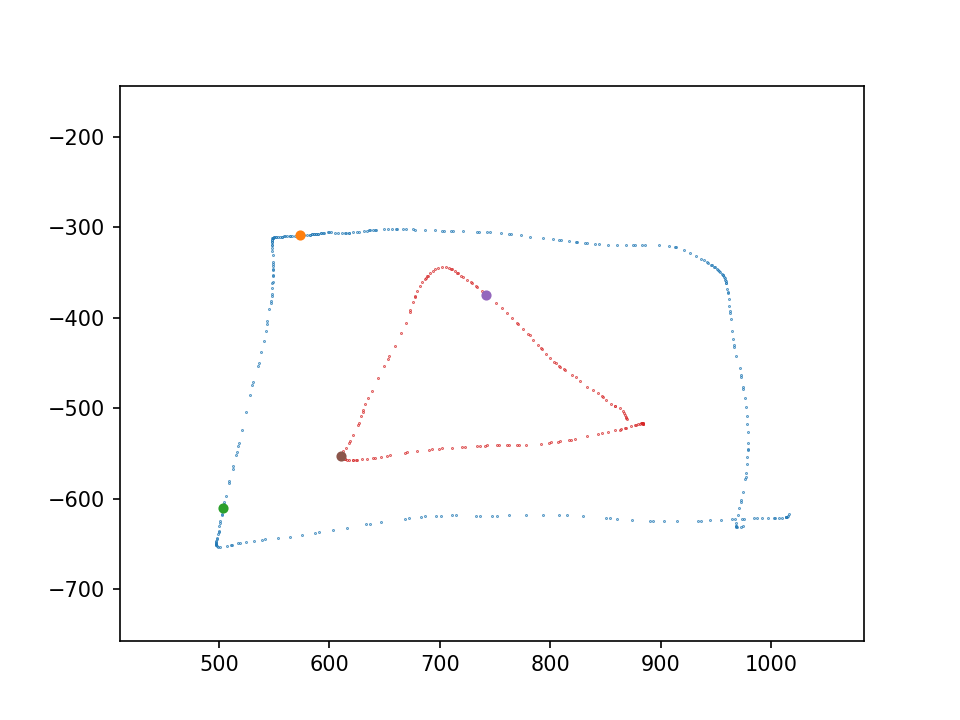

number of lines - 
6


In [172]:
numLiftToLine2(pic3)

### Combining the two algorithems from first and second trys

<IPython.core.display.Javascript object>


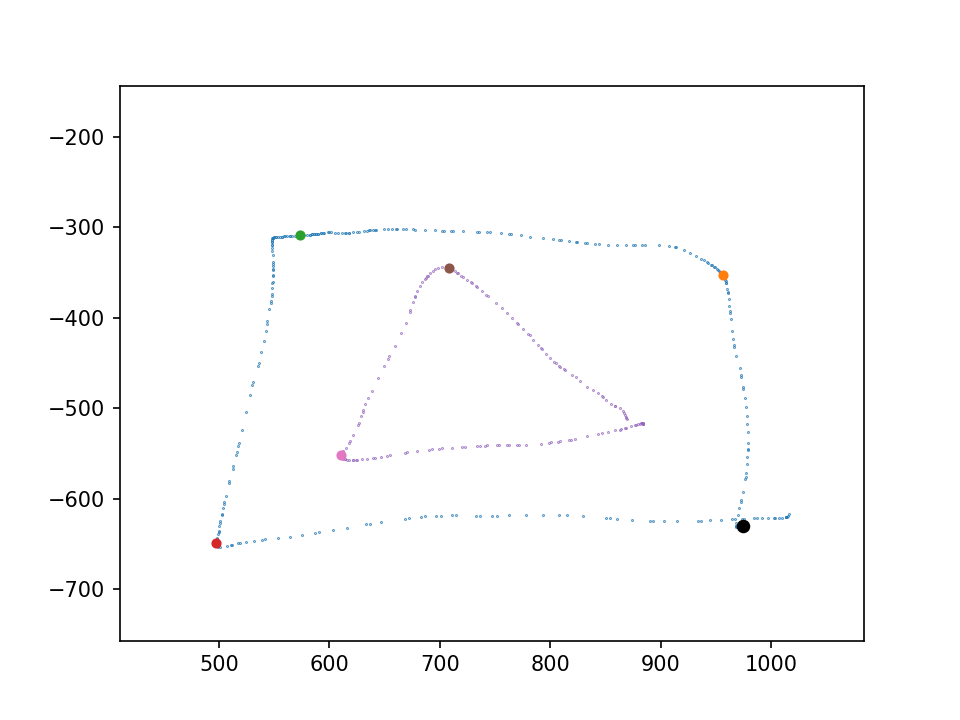

number of lines - 
7


In [180]:
numLiftToLine3(pic3) 

In [174]:
LenLine(pic3)

distances -
[278.5234119473226, 385.0856535032534, 348.23177828315727, 520.3846281364337, 231.60922554218345, 228.43932338685602, 276.09120655339814]
pressures -
[0.8075, 0.9696467937809405, 0.9714898003472222, 0.891819309543919, 0.7491832386363636, 0.83956298828125, 0.7828702059659091]


In [181]:
isClosed(pic3)

False

###  <font color='blue'> pic4-  </font>

In [75]:
pic4 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7570\SimpleTest\13.csv")

In [76]:
pic4 = clean(pic4)

In [77]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic4)))

The number of times the child raised his hand from the drawing: 3


<IPython.core.display.Javascript object>


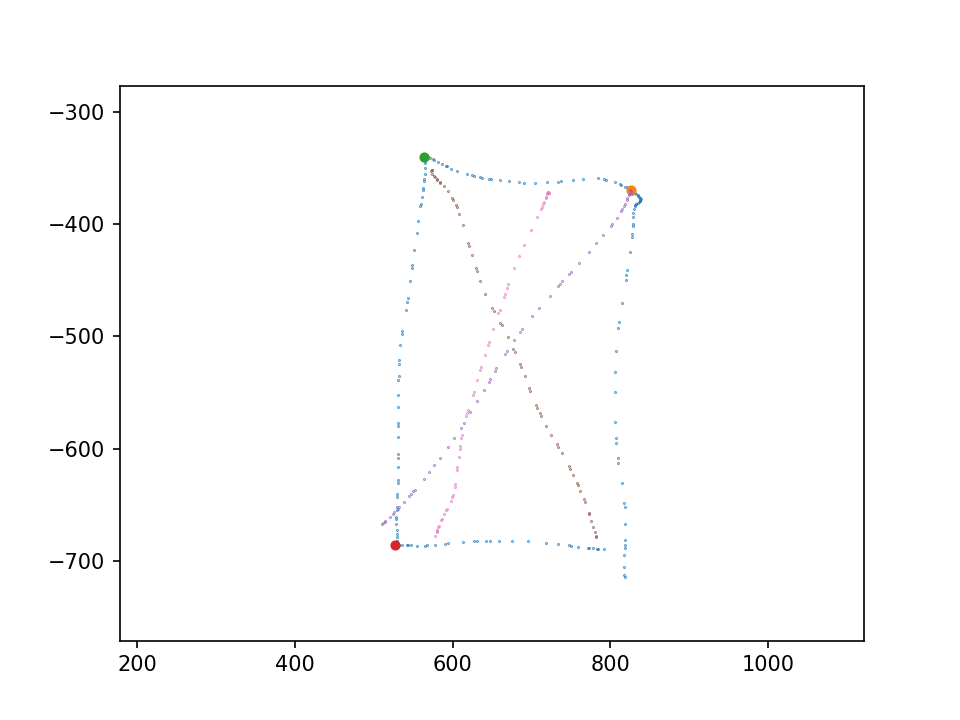

number of lines - 
7


In [116]:
numLiftToLine3(pic4) 

In [79]:
LenLine(pic4)

distances -
[344.9991601962399, 263.44519611534014, 347.5272670517303, 265.0829585243079, 432.2850523028113, 387.7722979654996, 336.9679688299191]
pressures -
[0.634423828125, 0.68929443359375, 0.6642986360143442, 0.6601443407012195, 0.3901847464139344, 0.5351359049479166, 0.5235402960526315]


### <font color='blue'> pic5-  </font>

In [91]:
pic5 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7573\SimpleTest\5.csv")

In [92]:
pic5 = clean(pic5)

In [93]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic5)))

The number of times the child raised his hand from the drawing: 2


<IPython.core.display.Javascript object>


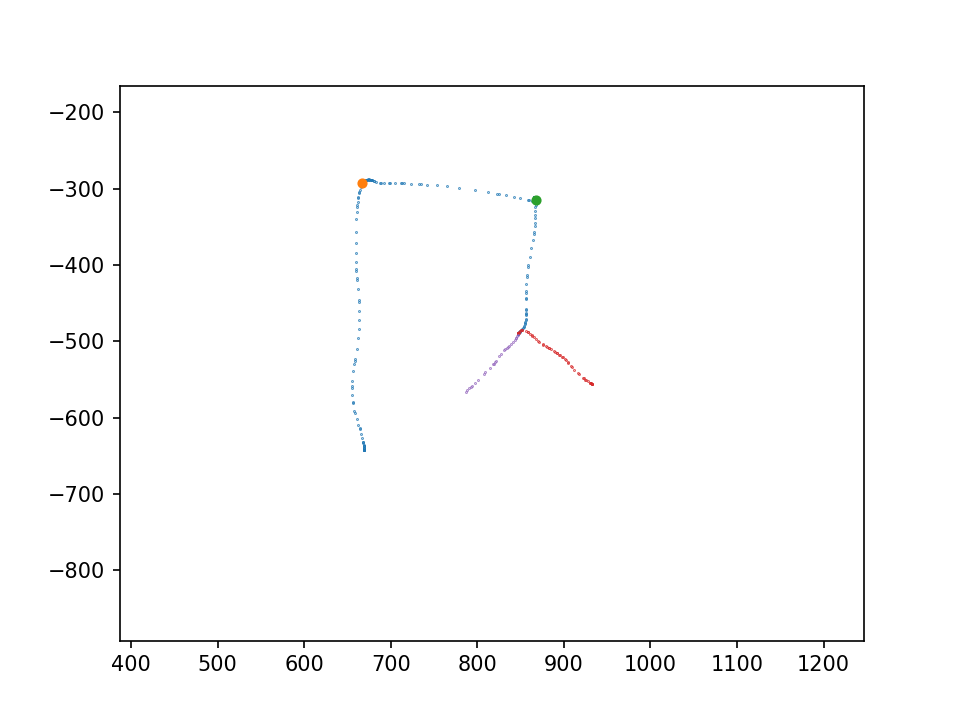

number of lines - 
5


In [120]:
numLiftToLine3(pic5) 

In [148]:
LenLine(pic5)

distances -
[343.0209107976435, 202.5689768137292, 176.37772761888053, 107.75513981360709, 94.7767251227854]
pressures -
[0.6581994258996212, 0.7910115559895833, 0.7952616583440721, 0.4254150390625, 0.3500162760416667]


### <font color='blue'> pic6-  </font>

In [136]:
pic6 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7557\SimpleTest\10.csv")

In [137]:
pic6 = clean(pic6)

In [138]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic6)))

The number of times the child raised his hand from the drawing: 10


<IPython.core.display.Javascript object>


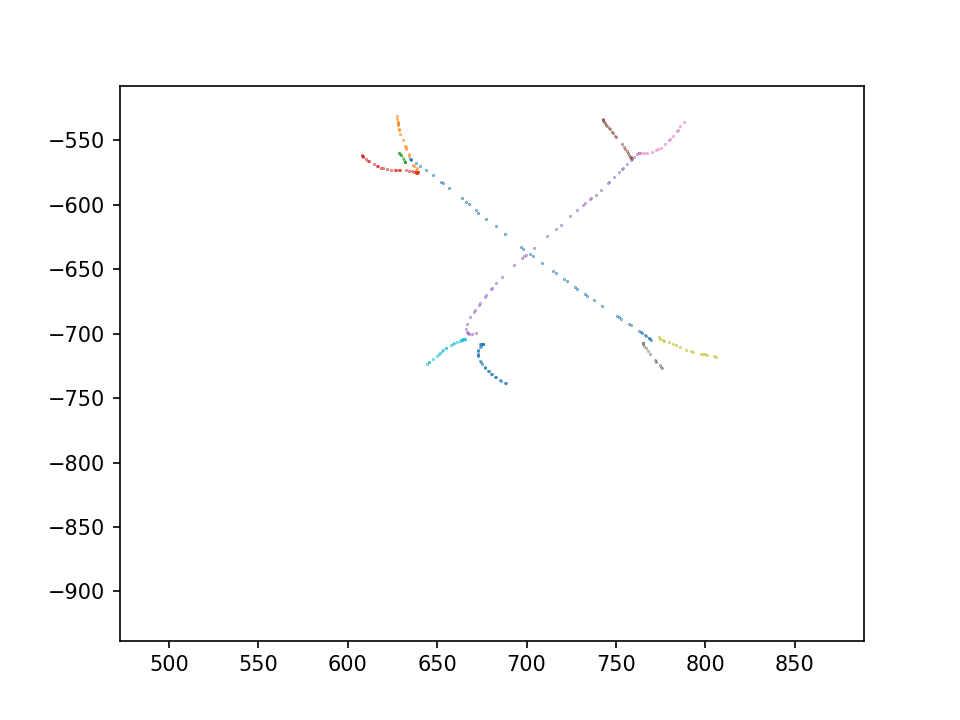

number of lines - 
11


In [147]:
numLiftToLine3(pic6) 

In [149]:
LenLine(pic6)

distances -
[193.80513003630037, 41.841484667572075, 8.36148713432474, 34.041839725212334, 166.54703385541302, 33.97019566414145, 34.23615396412393, 22.08194968926179, 34.76775019893784, 28.598165226444376, 33.49073592199921]
pressures -
[0.8359243804993837, 0.4893281418085098, 0.11067090962420817, 0.48559761583805083, 0.6783060590003399, 0.5065630392535873, 0.5776446338962106, 0.515966385602951, 0.5689021199941635, 0.6557009775530208, 0.6775376333722046]


### <font color='blue'> pic7-  </font>

In [155]:
pic7 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7573\SimpleTest\3.csv")

In [156]:
pic7 = clean(pic7)

In [176]:
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic7)))


The number of times the child raised his hand from the drawing: 0


<IPython.core.display.Javascript object>


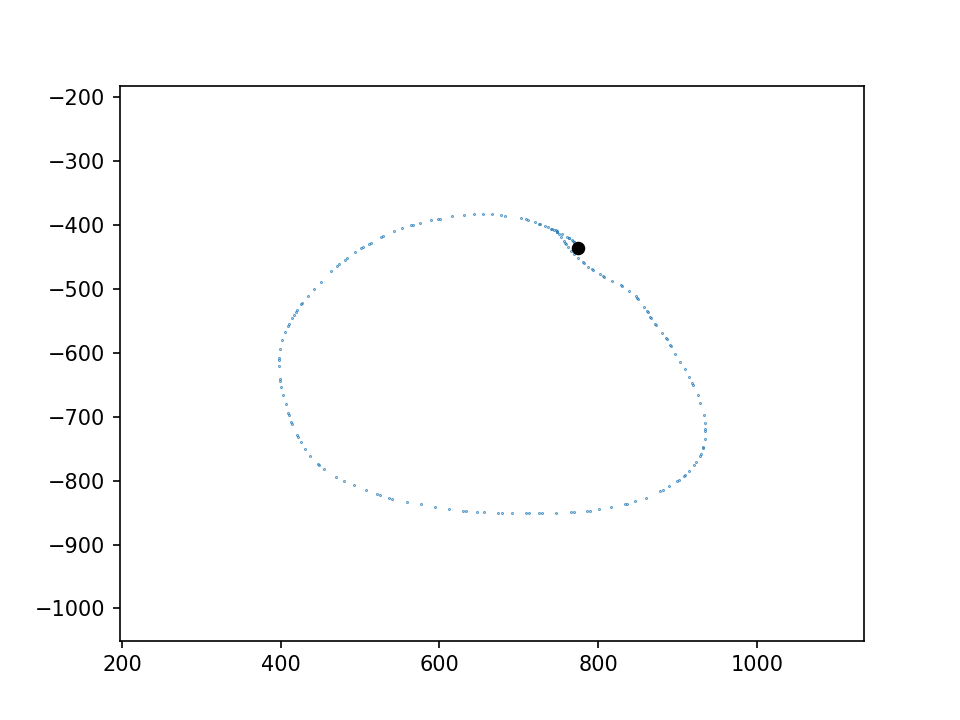

In [182]:
fig = plt.figure()
drow(pic7)

In [183]:
isClosed(pic7)

True

###  <font color='blue'> pic8-  </font>

In [184]:
pic8 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7557\SimpleTest\11.csv")
pic8 = clean(pic8)
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic8)))

The number of times the child raised his hand from the drawing: 1


<IPython.core.display.Javascript object>


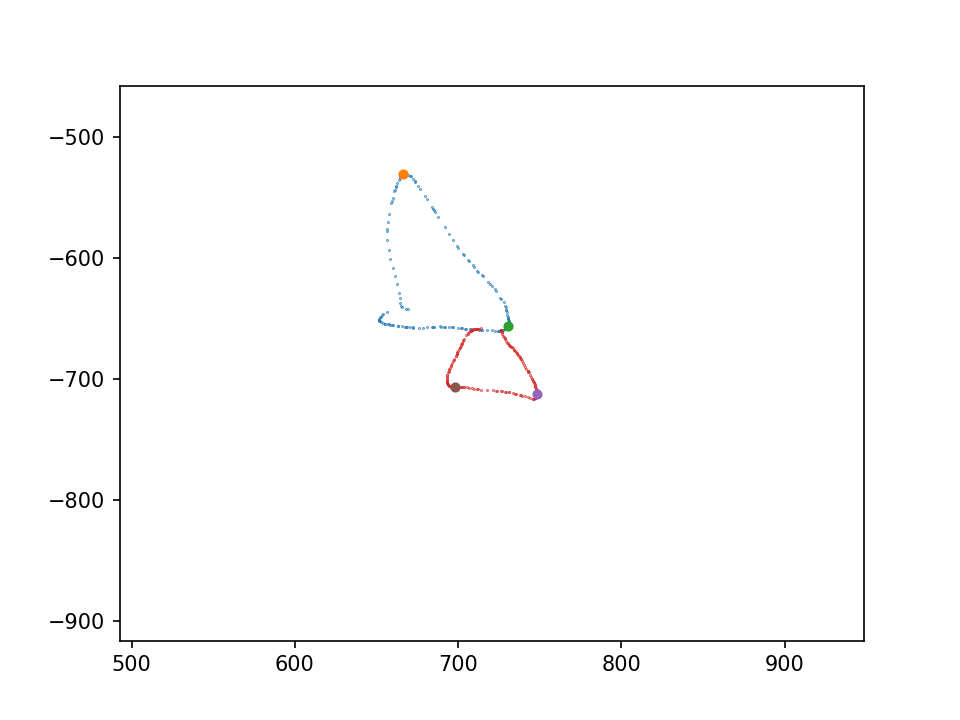

number of lines - 
6


In [206]:
numLiftToLine3(pic8) 

In [186]:
LenLine(pic8)

distances -
[110.99795460559781, 141.26968834672277, 75.28033706141012, 57.58997585447474, 50.51139519320166, 50.84335271206435]
pressures -
[0.6837228055923216, 0.8243177940448125, 0.8908609628677369, 0.5249493539126383, 0.732954909584739, 0.7728888939504754]


###  <font color='blue'> pic9-  </font>

In [193]:
pic9 = pd.read_csv(r"C:\Users\סיטרון\Documents\מדעי הנתונים\train\7558\SimpleTest\19.csv")
pic9 = clean(pic9)
print("The number of times the child raised his hand from the drawing: "+str(numLift(pic9)))

The number of times the child raised his hand from the drawing: 2


<IPython.core.display.Javascript object>


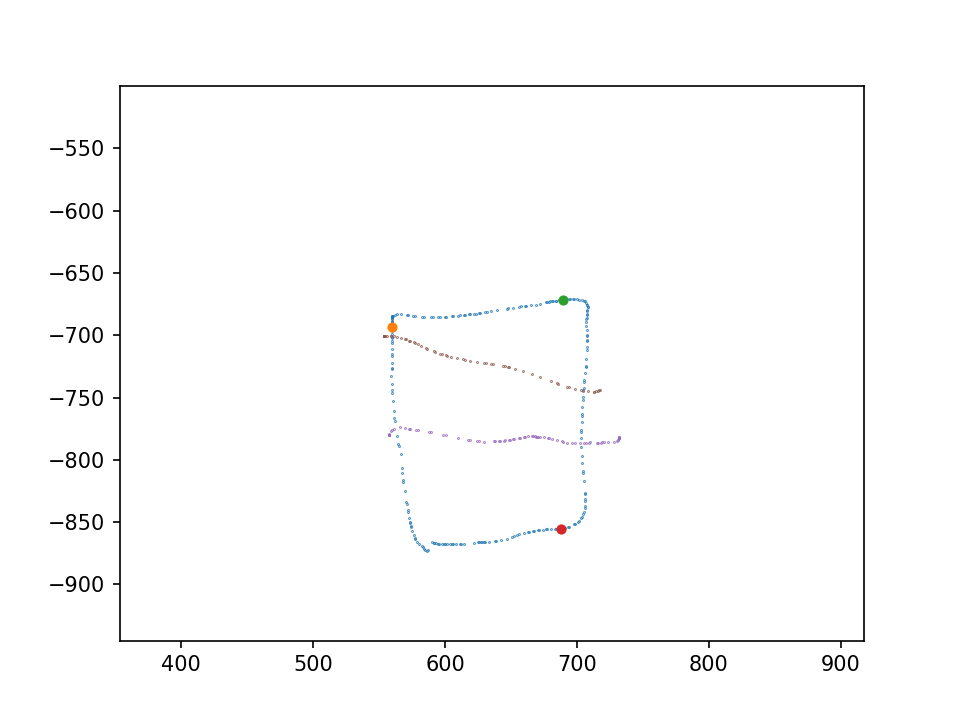

number of lines - 
6


In [205]:
numLiftToLine3(pic9) 

In [207]:
LenLine(pic9)

distances -
[181.42618148367782, 131.24888646386998, 184.0106903656129, 98.31211300513556, 174.1612885647538, 169.6230370300099]
pressures -
[0.6630377144205803, 0.8110840672796423, 0.8805625446968608, 0.92531259770089, 0.775006331205368, 0.6798027478276737]


# <font color='blue'> animating the plot   </font>

<IPython.core.display.Javascript object>


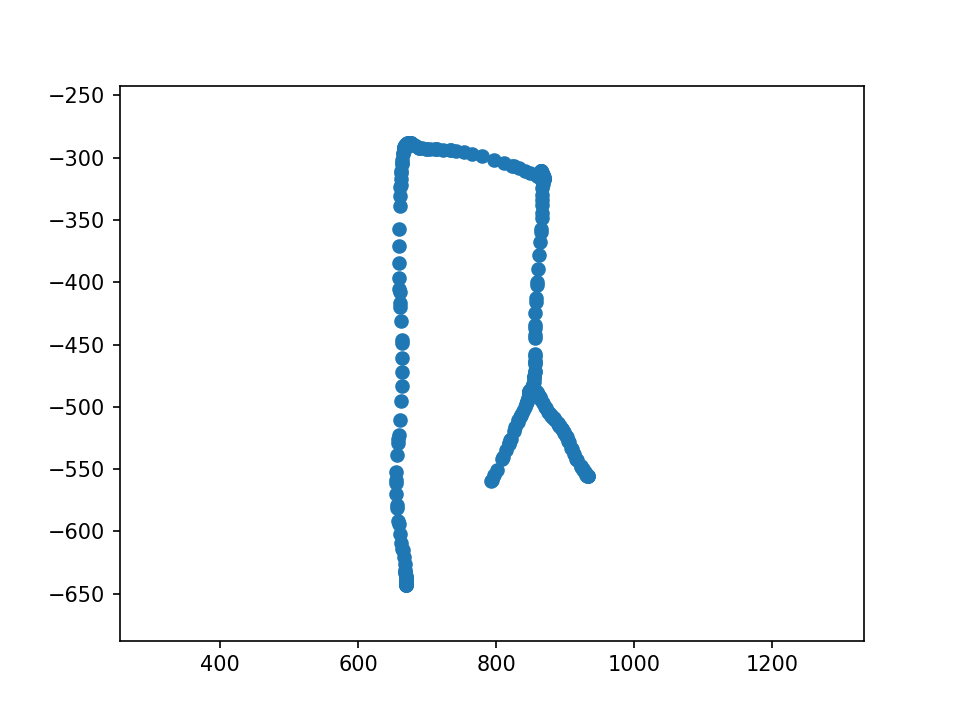

In [124]:
x = pic5['X']
y = -pic5[' Y']

fig = plt.figure()
plt.xlim(pic5['X'].min()-400 , pic5['X'].max() + 400)
plt.ylim(-pic5[' Y'].min()-400 , -pic5[' Y'].max() + 400)

graph, = plt.plot([], [], 'o')

graph
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(fig, animate, frames=len(pic5), interval=10)
plt.show()